In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [2]:
from Lo_r import LogisticRegression

In [36]:
def data_preprocessing(df):
    df.drop(['BloodPressure'], axis=1, inplace=True)
    
    cols = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']
    std = StandardScaler()
    
    for c in cols:
        df[c] = std.fit_transform(df[c].to_numpy().reshape(-1, 1))

    X = df.drop('Outcome', axis=1)
    y = df['Outcome']
    
    return df, X, y

In [37]:
df_train = pd.read_json('./diabetes_data/train.json', lines=True)
df_dev = pd.read_json('./diabetes_data/dev.json', lines=True)
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,80,55,0,0,19.1,0.258,21,0
1,1,124,74,36,0,27.8,0.100,30,0
2,10,108,66,0,0,32.4,0.272,42,1
3,2,120,76,37,105,39.7,0.215,29,0
4,11,136,84,35,130,28.3,0.260,42,1
...,...,...,...,...,...,...,...,...,...
532,4,127,88,11,155,34.5,0.598,28,0
533,1,90,68,8,0,24.5,1.138,36,0
534,8,120,78,0,0,25.0,0.409,64,0
535,3,106,54,21,158,30.9,0.292,24,0


In [38]:
df_train.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
df_train, X_train, y_train = data_preprocessing(df_train)
df_dev, X_dev, y_dev = data_preprocessing(df_dev)

<Axes: >

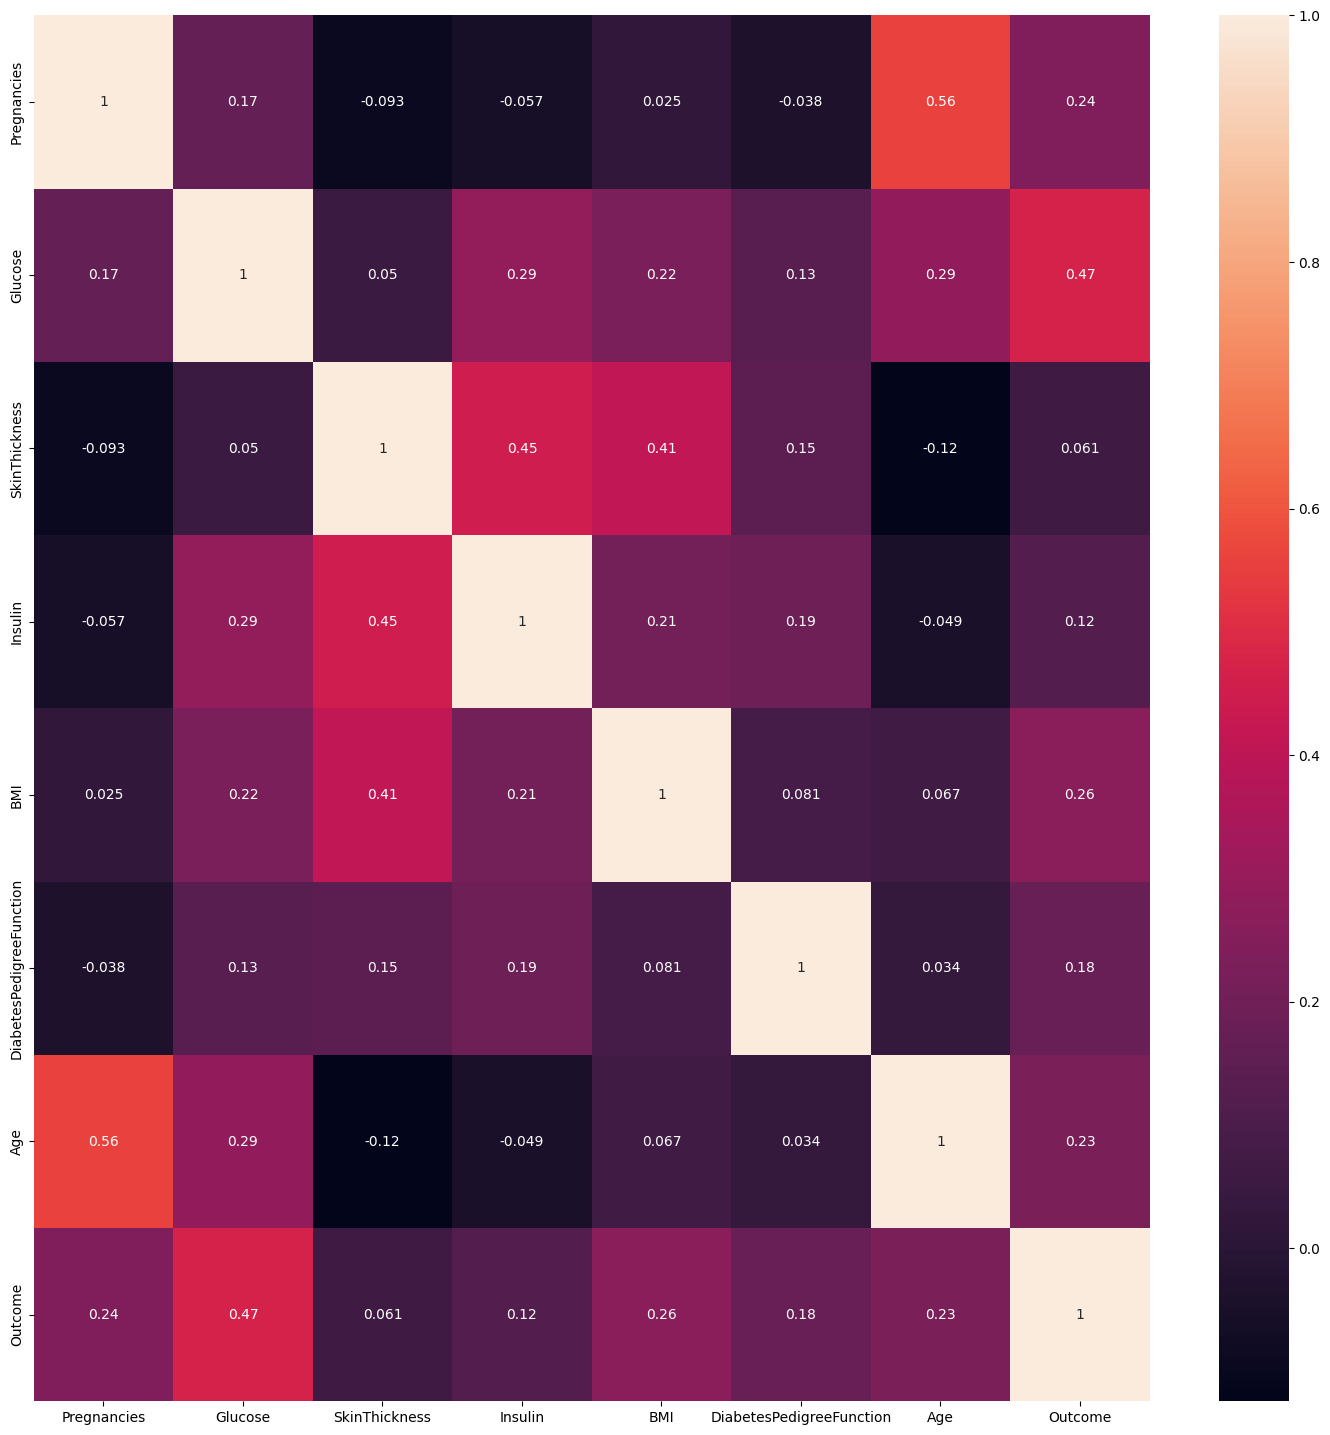

In [40]:
df_corr = df_train.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot=True)

In [41]:
def hyperparameter_tuning(X_train, y_train, X_dev, y_dev, param_grid):
    result = pd.DataFrame(columns=['param', 'f1_score', 'time'])
    for l in param_grid['learning_rate']:
        for m in param_grid['max_iter']:
            for f in param_grid['fit_intercept']:
                start = time.time()
                model = LogisticRegression(learning_rate=l, max_iter=m, fit_intercept=f)
                model.train_logistic_regression(X_train, y_train)
                end = time.time()
                y_pred = model.predict(X_dev)
                result.loc[len(result.index)] = [[l, m, f], f1_score(y_dev, y_pred), end-start]
                
    print(result)
    best_param = result.iloc[result['f1_score'].idxmax(), 0]        
    return best_param

In [42]:
param_grid = {'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.2], 'max_iter' : [200], 'fit_intercept' : [False]}

param = hyperparameter_tuning(X_train, y_train, X_dev, y_dev, param_grid)

                 param  f1_score
0  [0.001, 200, False]  0.805970
1  [0.005, 200, False]  0.805970
2   [0.01, 200, False]  0.787879
3   [0.05, 200, False]  0.787879
4    [0.1, 200, False]  0.794118
5    [0.2, 200, False]  0.816901
